In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', axisbelow=True)
SSSSSMALL_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SSSSSMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, auc

metrics = [
    'AUROC',
    'Accuracy',
    'Recall',
    'Precision',
    'F1 score',
    'AUPR'
]

def pr_auc(y_true, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall, precision)
    return pr_auc

def get_scores(y_true, y_prob, y_pred):
    """
    Compute a df with all classification metrics and respective scores.
    """
    
    scores = [
        roc_auc_score(y_true, y_prob),
        accuracy_score(y_true, y_pred),
        recall_score(y_true, y_pred),
        precision_score(y_true, y_pred),
        f1_score(y_true, y_pred),
        pr_auc(y_true, y_prob)
    ]
    
    df = pd.DataFrame(data={'score': scores, 'metrics': metrics})
    return df

In [13]:
login = os.getlogin( )
DATA_BASE = f"/home/{login}/Git/tc-hard/notebooks/notebooks.classification/results/"
FIGURE_BASE = f"/home/{login}/Git/tc-hard/notebooks/notebooks.classification-results/figures/"

In [14]:
df1 = pd.read_csv(DATA_BASE+"ergo2.vdjdb2mcpas.csv")
df2 = pd.read_csv(DATA_BASE+"nettcr2.vdjdb2mcpas.csv")
df3 = pd.read_csv(DATA_BASE+"ergo2.mcpas2vdjdb.csv")
df4 = pd.read_csv(DATA_BASE+"nettcr2.mcpas2vdjdb.csv")

df1 = get_scores(
        y_true=df1['sign'].to_numpy(), 
        y_prob=df1['prediction'].to_numpy(),
        y_pred=df1['prediction'].to_numpy().round(),
    )
df2 = get_scores(
        y_true=df2['sign'].to_numpy(), 
        y_prob=df2['prediction'].to_numpy(),
        y_pred=df2['prediction'].to_numpy().round(),
    )
df3 = get_scores(
        y_true=df3['sign'].to_numpy(), 
        y_prob=df3['prediction'].to_numpy(),
        y_pred=df3['prediction'].to_numpy().round(),
    )
df4 = get_scores(
        y_true=df4['sign'].to_numpy(), 
        y_prob=df4['prediction'].to_numpy(),
        y_pred=df4['prediction'].to_numpy().round(),
    )

df1['Setting'] = 'ERGO II'
df2['Setting'] = 'NetTCR-2.0'
df3['Setting'] = 'ERGO II'
df4['Setting'] = 'NetTCR-2.0'


vdjdb2mcpas = pd.concat([df1, df2])
mcpas2vdjdb = pd.concat([df3, df4])

In [15]:
vdjdb2mcpas = vdjdb2mcpas.rename(columns={'metrics': 'Metrics', 'score': 'Score'})
vdjdb2mcpas = vdjdb2mcpas.sort_values(by=['Setting'])
vdjdb2mcpas = vdjdb2mcpas.sort_values(by=['Metrics'])

In [16]:
mcpas2vdjdb = mcpas2vdjdb.rename(columns={'metrics': 'Metrics', 'score': 'Score'})
mcpas2vdjdb = mcpas2vdjdb.sort_values(by=['Setting'])
mcpas2vdjdb = mcpas2vdjdb.sort_values(by=['Metrics'])

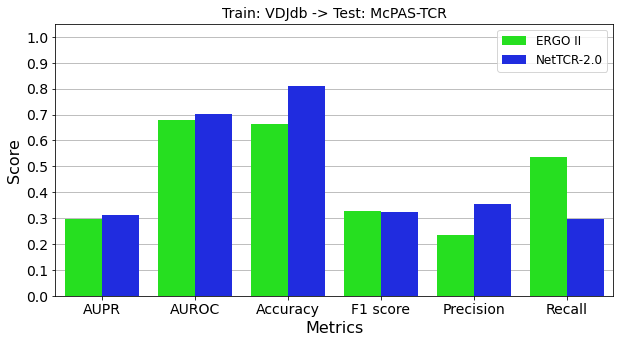

In [30]:
plt.rcParams['figure.figsize'] = [10, 5]
ax = sns.barplot(
    x="Metrics",
    y="Score", 
    hue="Setting", 
    data=vdjdb2mcpas,
    palette=sns.color_palette("hsv", 2)
)
ax.set_title('Train: VDJdb -> Test: McPAS-TCR')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend = plt.legend(frameon = 1, loc="upper right")
frame = legend.get_frame()
frame.set_facecolor('white')
ax.grid(axis='y')
plt.yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim([0, 1.05])

plt.savefig(FIGURE_BASE + "vdjdb2mcpas.png", format='png', dpi=300, bbox_inches='tight')

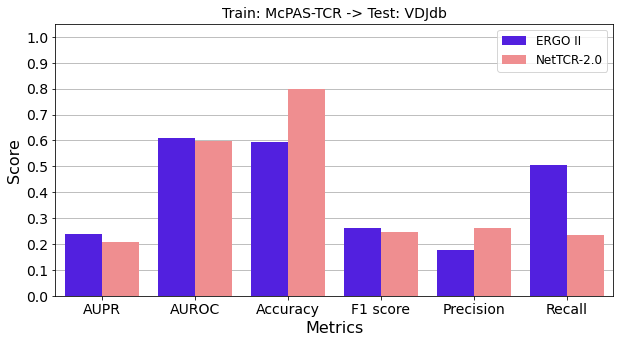

In [31]:
plt.rcParams['figure.figsize'] = [10, 5]
ax = sns.barplot(
    x="Metrics",
    y="Score", 
    hue="Setting", 
    data=mcpas2vdjdb,
    palette=sns.color_palette("gnuplot2", 2)
)
ax.set_title('Train: McPAS-TCR -> Test: VDJdb')
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
legend = plt.legend(frameon = 1, loc="upper right")
frame = legend.get_frame()
frame.set_facecolor('white')
ax.grid(axis='y')
plt.yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim([0, 1.05])

plt.savefig(FIGURE_BASE + "mcpas2vdjdb.png", format='png', dpi=300, bbox_inches='tight')